In [72]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [73]:
bp_file = '/data/data1/diabetes/EMR-data/BP.csv'
bp_file_p = '/data/data1/diabetes/EMR-data2/BP.csv'

In [78]:
data_pd = pd.read_csv(bp_file, sep='|')


In [79]:
data_pd.shape

(203420, 3)

In [77]:
data_pd.head()

,Deidentified_Pat_ID,BP,RecordedYear
0,ZDTGTTA,130/71,2014
1,ZDTGTTA,127/73,2014
2,ZDTGTTA,120/80,2014
3,ZDTGTTA,111/67,2014
4,ZDTGTTA,101/59,2014


In [80]:
na_dt = data_pd[data_pd['BP'].isna()]
na_dt.head()

,Deidentified_Pat_ID,BP,RecordedYear
302,ZDGAZVDT,NaN,2014
303,ZDGAZVDT,NaN,2014
622,ZDNNKDNZ,NaN,2014
923,ZHZHKDKO,NaN,2014
1312,ZDTKNVK,NaN,2014


In [81]:
len(data_pd)

203420

In [82]:
data_pd = data_pd[data_pd['BP'].notna()]
len(data_pd)

203066

In [83]:
pd.Series(data_pd["BP"].tolist()).sort_values().unique()

array(['100/30', '100/39', '100/40', ..., '99/82', '99/85', '99/86'],
      dtype=object)

In [84]:
data_pd['BP'] = data_pd['BP'].astype('str')

In [85]:
pd.Series(data_pd["BP"].tolist()).sort_values().unique()

array(['100/30', '100/39', '100/40', ..., '99/82', '99/85', '99/86'],
      dtype=object)

In [86]:
na_dt = data_pd[data_pd['BP'].isna()]
na_dt.head()

,Deidentified_Pat_ID,BP,RecordedYear


In [87]:
tt = data_pd['BP'].str.split('/',expand=True)

In [50]:
tt.tail()

,0,1
203415,150,96
203416,118,78
203417,132,62
203418,134,84
203419,136,84


In [88]:
data_pd['bp_high'] = data_pd['BP'].map(lambda x: x.split('/')[0])
data_pd['bp_low'] = data_pd['BP'].map(lambda x: x.split('/')[1])

In [89]:
data_pd.head()

,Deidentified_Pat_ID,BP,RecordedYear,bp_high,bp_low
0,ZDTGTTA,130/71,2014,130,71
1,ZDTGTTA,127/73,2014,127,73
2,ZDTGTTA,120/80,2014,120,80
3,ZDTGTTA,111/67,2014,111,67
4,ZDTGTTA,101/59,2014,101,59


In [102]:
data_pd['bp_high'] = data_pd['bp_high'].astype('int')
data_pd['bp_low'] = data_pd['bp_low'].astype('int')
data_pd.shape


(203066, 5)

In [103]:
len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

6157

In [104]:
data_pd.sort_values(["Deidentified_Pat_ID","bp_high"], inplace=True)
data_pd.head(n=10)


,Deidentified_Pat_ID,BP,RecordedYear,bp_high,bp_low
55590,MGVKKNZN,120/78,2018,120,78
60324,MGVNDNAK,102/66,2019,102,66
172627,MNAAOKVG,112/68,2019,112,68
39828,MNAAOKVG,122/82,2017,122,82
42932,MNAAOKVG,124/76,2017,124,76
26359,MNAAOKVG,126/88,2016,126,88
103211,MNAAOKVG,136/80,2017,136,80
116398,MNADDANN,116/88,2019,116,88
58727,MNADDANN,124/92,2018,124,92
118604,MNADDANN,124/76,2019,124,76


In [105]:
data_pd.shape

(203066, 5)

In [106]:
len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

6157

In [107]:
single_data1 = data_pd.drop_duplicates(["Deidentified_Pat_ID"], keep='last')
single_data1.head(n=10)

,Deidentified_Pat_ID,BP,RecordedYear,bp_high,bp_low
55590,MGVKKNZN,120/78,2018,120,78
60324,MGVNDNAK,102/66,2019,102,66
103211,MNAAOKVG,136/80,2017,136,80
36829,MNADDANN,134/98,2017,134,98
88480,MNADOVKN,139/95,2016,139,95
43822,MNADZOHA,138/88,2017,138,88
155783,MNAGDKZZ,132/68,2017,132,68
115513,MNANKNAN,154/87,2018,154,87
92211,MNANZAKG,150/84,2017,150,84
115826,MNAODHZZ,168/93,2019,168,93


In [108]:
single_data1.shape

(6157, 5)

In [109]:
single_data1.to_csv(bp_file_p, index=False)

In [110]:
single_data1.max()

Deidentified_Pat_ID    ZZZZZTV
BP                       98/60
RecordedYear              2019
bp_high                    430
bp_low                     148
dtype: object

In [111]:
single_data1.describe()

,RecordedYear,bp_high,bp_low
count,6157.000000,6157.000000,6157.000000
mean,2016.841156,144.323372,82.390287
std,1.515603,19.612106,11.606942
min,2014.000000,90.000000,8.000000
25%,2016.000000,131.000000,74.000000
50%,2017.000000,140.000000,82.000000
75%,2018.000000,156.000000,90.000000
max,2019.000000,430.000000,148.000000


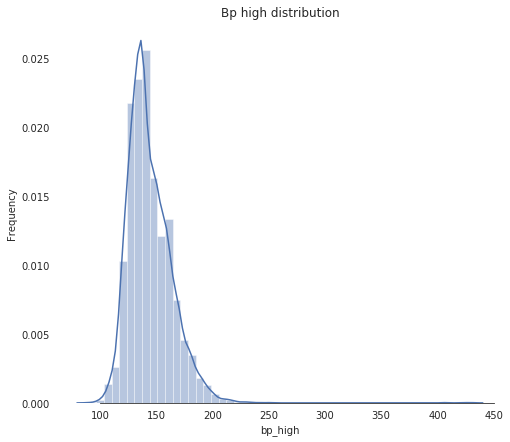

In [113]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(single_data1['bp_high'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_high")
ax.set(title="Bp high distribution")
sns.despine(trim=True, left=True)
plt.show()

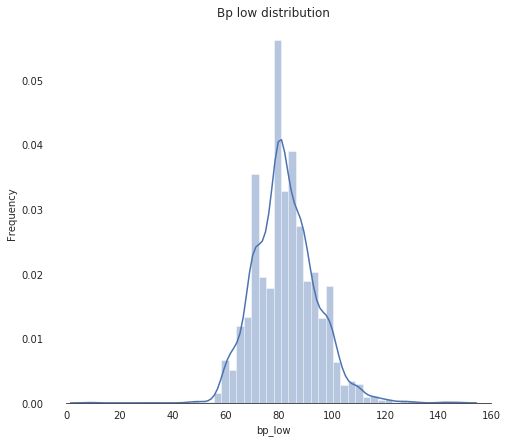

In [123]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(single_data1['bp_low'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_low")
ax.set(title="Bp low distribution")
sns.despine(trim=True, left=True)
plt.show()

In [115]:
len(single_data1[single_data1["bp_high"]>300])

3

In [116]:
data_pd_less_200  = data_pd[data_pd['bp_high']<230]

In [117]:
data_pd_less_200.sort_values(["Deidentified_Pat_ID","bp_high"], inplace=True)
data_pd_less_200.head(n=10)


,Deidentified_Pat_ID,BP,RecordedYear,bp_high,bp_low
55590,MGVKKNZN,120/78,2018,120,78
60324,MGVNDNAK,102/66,2019,102,66
172627,MNAAOKVG,112/68,2019,112,68
39828,MNAAOKVG,122/82,2017,122,82
42932,MNAAOKVG,124/76,2017,124,76
26359,MNAAOKVG,126/88,2016,126,88
103211,MNAAOKVG,136/80,2017,136,80
116398,MNADDANN,116/88,2019,116,88
58727,MNADDANN,124/92,2018,124,92
118604,MNADDANN,124/76,2019,124,76


In [118]:
data_pd_less_200_1 = data_pd_less_200.drop_duplicates(["Deidentified_Pat_ID"], keep='last')
data_pd_less_200_1.head(n=10)

,Deidentified_Pat_ID,BP,RecordedYear,bp_high,bp_low
55590,MGVKKNZN,120/78,2018,120,78
60324,MGVNDNAK,102/66,2019,102,66
103211,MNAAOKVG,136/80,2017,136,80
36829,MNADDANN,134/98,2017,134,98
88480,MNADOVKN,139/95,2016,139,95
43822,MNADZOHA,138/88,2017,138,88
155783,MNAGDKZZ,132/68,2017,132,68
115513,MNANKNAN,154/87,2018,154,87
92211,MNANZAKG,150/84,2017,150,84
115826,MNAODHZZ,168/93,2019,168,93


In [119]:
data_pd_less_200_1.describe()

,RecordedYear,bp_high,bp_low
count,6157.000000,6157.000000,6157.000000
mean,2016.842131,144.162742,82.390775
std,1.515276,18.551480,11.594975
min,2014.000000,90.000000,8.000000
25%,2016.000000,131.000000,74.000000
50%,2017.000000,140.000000,82.000000
75%,2018.000000,156.000000,90.000000
max,2019.000000,228.000000,148.000000


In [120]:
len(data_pd_less_200_1)

6157

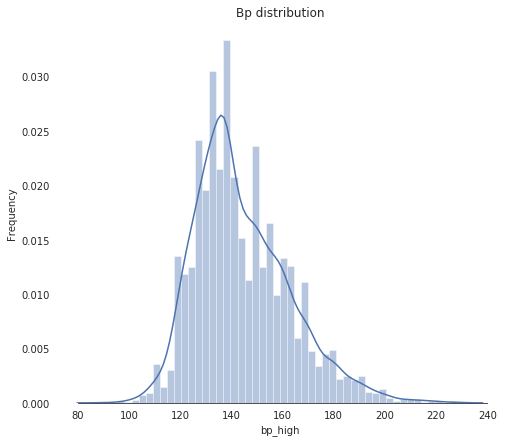

In [121]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(data_pd_less_200_1['bp_high'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_high")
ax.set(title="Bp distribution")
sns.despine(trim=True, left=True)
plt.show()

In [32]:
data_pd_less_200_1.to_csv(bp_file_p, index=False)

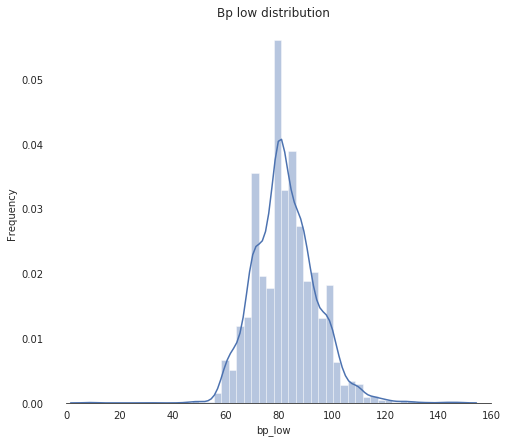

In [124]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(data_pd_less_200_1['bp_low'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_low")
ax.set(title="Bp low distribution")
sns.despine(trim=True, left=True)
plt.show()